# Understand the importance factor

In [1]:
# Import the pyKasso and numpy packages
import pykasso as pk

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 0,
    'y0': 0,
    'z0': 0,
    'nx': 300,
    'ny': 300,
    'nz': 1,
    'dx': 10,
    'dy': 10,
    'dz': 10,
}

# Declare the project parameters
app.new_project(name='importance_factor', grid_parameters=grid_parameters)
nx, ny, nz = app.project.grid.shape
app.visualizer.notebook = True

In [2]:
# Declare the model parameters
model_parameters = {
    'sks' : {},
    'outlets' : {
        'seed'  : 1, 
        'number': 3,
    },
    'inlets' : {
        'seed'  : 1,
        'number': 30,
    },
    'fractures' : {
        # 'seed': 111111,
        'generate': {
            'family_01': {
                'density'      : 0.00005,
                'orientation'  : 135,
                'dip'          : 90,
                'length'       : 300,
            },
            'family_02': {
                'density'      : 0.00005,
                'orientation'  : 45,
                'dip'          : 90,
                'length'       : 500,
            }
        }
    }
}

In [3]:
inlets_importances = [[1], [1, 2], [1, 2, 3]]
# inlets_importances = [[1], [1, 1]]
# inlets_importances = [[1]]
outlets_importances = [[1], [1, 1], [1, 1, 1]]
# outlets_importances = [[1], [1, 1]]
# outlets_importances = [[1]]

seed = 0
for outlets_importance in outlets_importances:
    for inlets_importance in inlets_importances:
        
        # Update parameters
        seed = seed + 1
        model_parameters['sks']['seed'] = seed
        model_parameters['outlets']['importance'] = outlets_importance
        model_parameters['inlets']['importance'] = inlets_importance
        
        # Compute simulation
        app.model.generate(model_parameters=model_parameters)
        
        # Print information
        print('outlets_importance', outlets_importance)
        print('inlets_importance', inlets_importance)
        print(app.model.iterations)
        print('\n')
        


outlets_importance [1]
inlets_importance [1]
             outlets                                             inlets
iteration                                                              
0          [0, 1, 2]  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...


outlets_importance [1]
inlets_importance [1, 2]
             outlets                                             inlets
iteration                                                              
0          [0, 1, 2]                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1          [0, 1, 2]  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...


outlets_importance [1]
inlets_importance [1, 2, 3]
             outlets                                             inlets
iteration                                                              
0          [0, 1, 2]                                    [0, 1, 2, 3, 4]
1          [0, 1, 2]                [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
2          [0, 1, 2]  [15, 16, 17, 18, 19, 20, 21, 22, 23, 2

In [4]:
app.model.outlets
app.model._outlets

,x,y,z,outlet_iteration
0,1406.441596,2864.486494,-1.881685,0
1,1526.441596,1634.486494,-1.881685,1
2,2256.441596,1654.486494,-1.881685,2


In [5]:
app.model.inlets
app.model._inlets

,x,y,z,outlet_key,inlet_iteration
0,1409.534979,2856.340417,-0.96887,0,0
1,1529.534979,1626.340417,-0.96887,0,0
2,2259.534979,1646.340417,-0.96887,0,1
3,2849.534979,406.340417,-0.96887,0,1
4,99.534979,1356.340417,-0.96887,0,1
5,429.534979,736.340417,-0.96887,0,2
6,2459.534979,2636.340417,-0.96887,0,2
7,2839.534979,1776.340417,-0.96887,0,2
8,739.534979,2296.340417,-0.96887,0,2
9,929.534979,1636.340417,-0.96887,0,2


In [6]:
app.model.iterations

,outlets,inlets
iteration,,
0,[0],"[0, 1]"
1,[0],"[2, 3, 4]"
2,[0],"[5, 6, 7, 8, 9]"
3,[1],"[10, 11]"
4,[1],"[12, 13, 14]"
5,[1],"[15, 16, 17, 18, 19]"
6,[2],"[20, 21]"
7,[2],"[22, 23, 24]"
8,[2],"[25, 26, 27, 28, 29]"


In [7]:
# app.model.model_parameters['inlets']

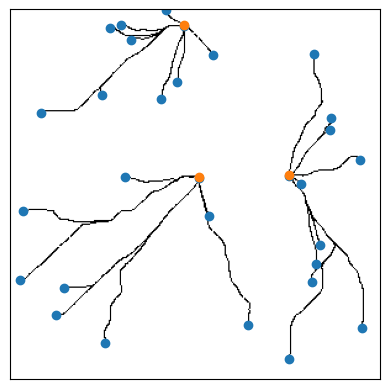

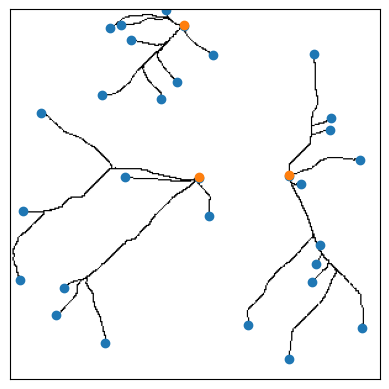

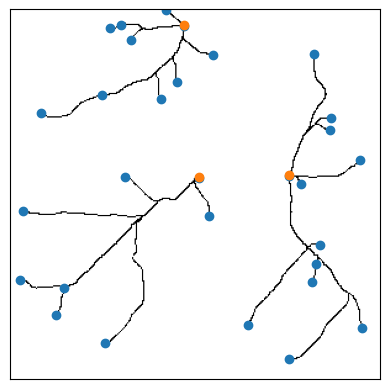

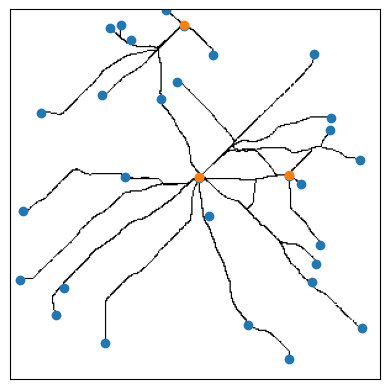

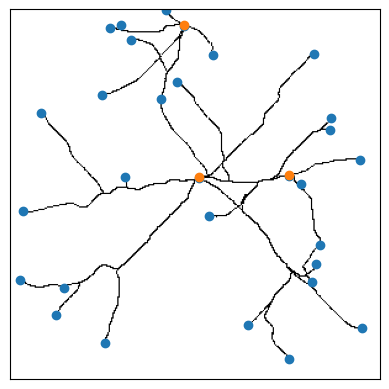

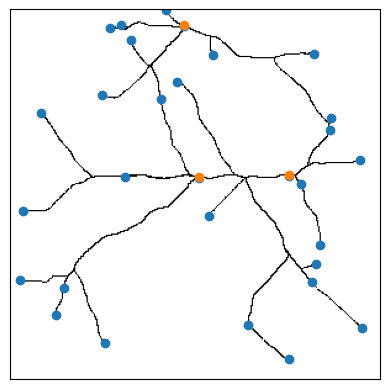

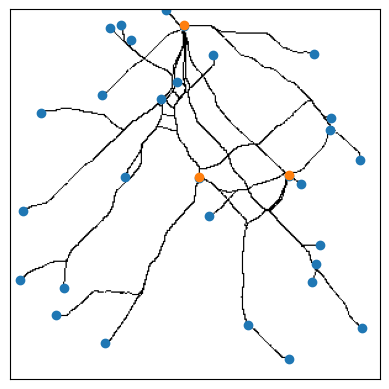

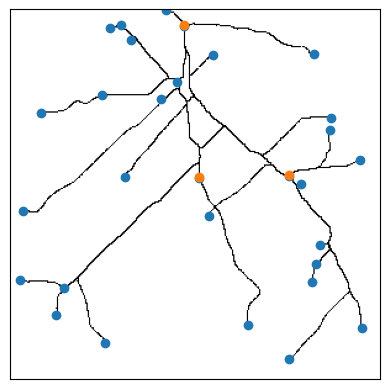

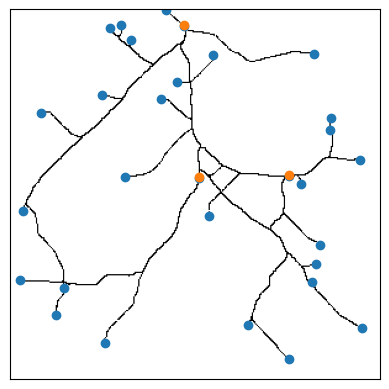

In [8]:
# Plot the last simulated karstic conduit network
sims = app.project.get_simulations()
fnames = []
for sim in sims:
    outlets_importance = app.project[sim]['parameters']['outlets']['importance']
    outlets_importance = [str(elem) for elem in outlets_importance]
    io = 'o-' + '-'.join(outlets_importance)
    
    inlets_importance = app.project[sim]['parameters']['inlets']['importance']
    inlets_importance = [str(elem) for elem in inlets_importance]
    ii = 'i-' + '-'.join(inlets_importance)
    
    fname = 'img/if_' + io + '_' + ii + '.png'
    fnames.append(fname)
    
    fig = app.visualizer.mpl_plot_2D(n_sim=sim,
                                     feature='karst',
                                     imshow_options={'cmap': 'binary'},
                                     scatter_inlets_options={},
                                     scatter_outlets_options={},
                                     show_colorbar=False,
                                     show_axis=False,
                                     )
    fig.fig.savefig(fname, bbox_inches='tight')

In [9]:
fnames

['img/if_o-1_i-1.png',
 'img/if_o-1_i-1-2.png',
 'img/if_o-1_i-1-2-3.png',
 'img/if_o-1-1_i-1.png',
 'img/if_o-1-1_i-1-2.png',
 'img/if_o-1-1_i-1-2-3.png',
 'img/if_o-1-1-1_i-1.png',
 'img/if_o-1-1-1_i-1-2.png',
 'img/if_o-1-1-1_i-1-2-3.png']